In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
from Legendre import *
from Library import * 
from ipywidgets import interact
import scipy.interpolate as interp

In [3]:
data = Cn2.read_csv('/scratchm/eklotz/Cn2_Tenerife_2020_fromSoundings.csv')
data.rm_zeros()
data.set_ground_level(inplace = True)
data.filtre(50)

100%|██████████| 714/714 [00:00<00:00, 801.68it/s]


In [10]:
def pp(date, nbsegments, nbpoints_per_segment):
    r0 = lambda x, t : np.power((0.423*(2*np.pi/1.55e-6)**2*simps(x, t)), (-3/5))
    theta0 = lambda x, t : np.power((2.914*(2*np.pi/1.55e-6)**2 * simps(x*np.power(t, (5/3)), t)), (-3/5))*1e6
    alt = data[date].alt.values
    cn2 = data[date].Cn2.values
    wspeed = data[date].wspeed.values


    plt.figure(figsize=(20,10))

    plt.subplot(121)
    print(f'Integrale du profil brut : {simps(cn2, alt)}')
    print(f'r0 du profil brut : {r0(cn2, alt):.4f} cm ')
    print(f'theta0 du profil brut : {theta0(cn2, alt):.4f} µrad ')

    plt.semilogx(cn2, alt, label = 'Raw Cn2 profile')
    if nbsegments >1:
        alt = np.array_split(alt, nbsegments)
        cn2 = np.array_split(cn2, nbsegments)
        roots, res = interp_gauss_legendre_pp(nbpoints_per_segment, alt, cn2)
        for k in alt:
            plt.axhline(k[0], linestyle='--', color = 'grey', linewidth = 0.5)
    else : 
        roots, res = interp_gauss_legendre(nbpoints_per_segment, alt, cn2, norm=True)

    plt.semilogx(res, roots, label = 'Interpolated Cn2 profile')
    print(f'Integrale du profil interpolé : {simps(res, roots)}')
    print(f'r0 du profil interpolé : {r0(res, roots):.4f} cm')
    print(f'theta0 du profil brut : {theta0(res, roots):.4f} µrad ')
    plt.xlabel('Cn2')
    plt.ylabel('Alt (m)')
    plt.autoscale(tight=True)
    plt.legend()

    plt.subplot(122)

    plt.plot(wspeed, alt, label = 'Wind Speed')
    f = interp.interp1d(alt, wspeed)
    plt.plot(f(roots), label = 'Interpolated Wind Speed')
    plt.xlabel('Win Speed (m.s^-1')
    plt.ylabel('Alt (m)')
    plt.autoscale(tight=True)
    plt.legend()

interactive(children=(Dropdown(description='date', options=('2020-01-01 11:00:00', '2020-01-01 23:00:00', '202…

<function __main__.pp(date, nbsegments, nbpoints_per_segment)>

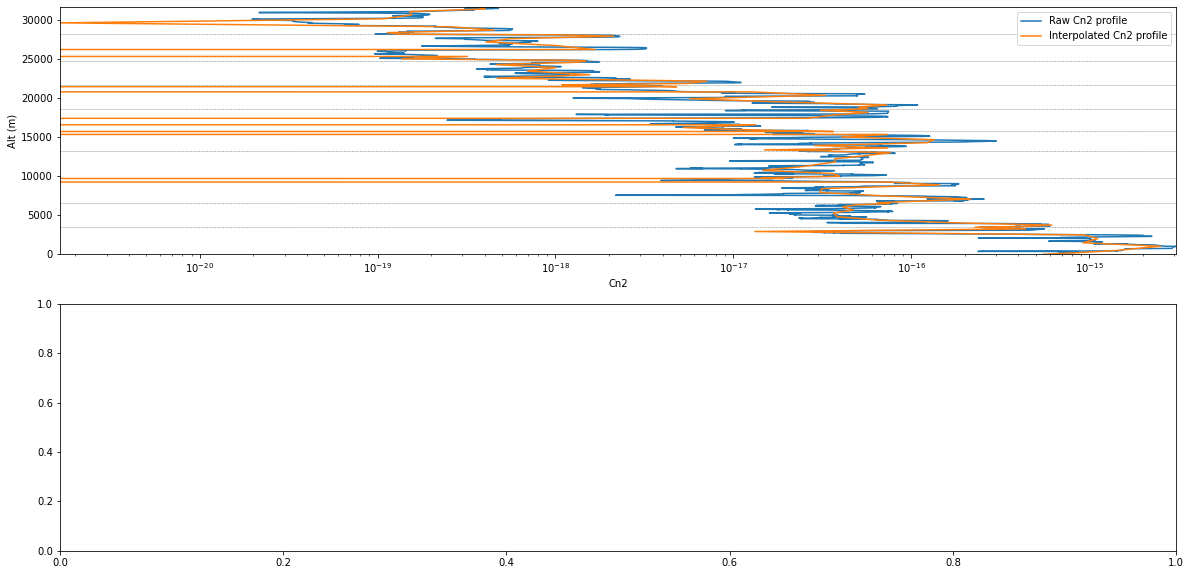

In [11]:
interact(pp, date = data.dates, nbsegments = 10, nbpoints_per_segment = 10)

In [8]:
roots

<function numpy.roots(p)>

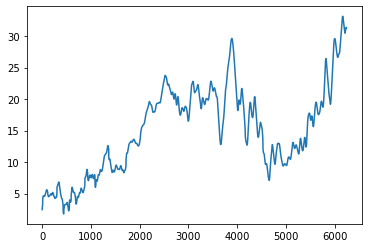

In [7]:
plt.plot(data[50].wspeed.values)